Las raíces del polinomio del numerador se denominan ceros del sistema.
Las raíces del polinomio del denominador se denominan polos del sistema

Diagrama de polos y ceros

Los polos se representan con un equis
Los ceros se representan con un circulo



In [56]:
import matplotlib.pyplot as plt
import numpy as np
import control as ct
import pandas as pd

plt.style.use('seaborn')


def graficar(t,y, title):
    fig, ax = plt.subplots()
    ax.plot(t, y)
    ax.set_xlabel('time')
    ax.set_ylabel('y')
    ax.set_title(title)
    #ax.legend()


## 2 Sistema masa resorte amortiguador con excitación ***(20 puntos)***

Considere el sistema masa resorte amortiguador de la sección 5 del trabajo
anterior, con las mismas consideraciones, valores de elementos y
<u>condiciones iniciales nulas</u>.

- Determine la función de transferencia del sistema, asumiendo que la
entrada es la fuerza $(f(t))$ y la salida es el desplazamiento $(x(t))$.

Sistema ***sobreamortiguado***

$$10y''+\frac{800}{63}y'+\frac{250}{63}y=0$$

Funcion de transferencia

$$H(s)=\frac{1}{10s^2+\frac{800}{63}s+\frac{250}{63}}$$

Sistema ***subamortiguado***

$$10y''+25y'+1595y=0$$

Funcion de transferencia

$$H(s)=\frac{1}{10s^2+25s+1595}$$


- Asumiendo que la fuerza de entrada $f(t)$ es la misma fuerza del trabajo
3, determine su transformada de Laplace $F(s)$. Use esta información
(junto con la función de transferencia) para calcular el desplazamiento
en función del tiempo $x(t)$ asumiendo <u>condiciones iniciales nulas</u>.

- Implemente el sistema usando los bloques de la librería mecánica de
OpenModelica y obtenga la solución numérica para su desplazamiento
$x(t)$.

- Implemente el sistema utilizando el bloque de función de transferencia
de la librería Blocks de OpenModelica y obtenga su respuesta $x(t)$.

- Exporte los datos a Python y compare ambas respuestas. ¿Es la función
de transferencia una representación adecuada del sistema mecánico?


## 3 Función de transferencia y respuesta al escalón (30 puntos)

Considere un sistema lineal invariante cuya respuesta a la excitación <u>escalón
unitario</u> (asumiendo condiciones iniciales nulas) está dada por la siguiente
señal: (ver Tabla 1, columna "Respuesta al escalón").

- Determine (manualmente) la función de transferencia del sistema y su
diagrama de polos y ceros.


- Determine (manualmente) la respuesta del sistema a la excitación
impulso unitario en el dominio de t (asumiendo condiciones iniciales
nulas).

- Utilice el paquete de control de Python para implementar la función
de transferencia. Use la función de trazado del mapa de polos y ceros
y compare la gráfica obtenida con el diagrama realizado manualmente.

Funcion de transferencia


TransferFunction(array([ -4, -10]), array([1, 4, 5]))

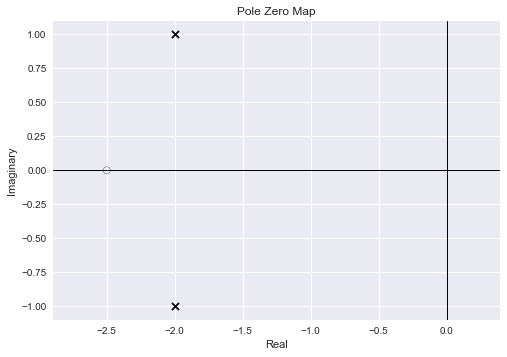

In [57]:
H = ct.tf([-4,-10], [1,4,5])
print('Funcion de transferencia')
ct.pzmap(H)
H


- Utilice el paquete de control de Python para obtener la respuesta al
escalón de la función de transferencia implementada en el ítem anterior.
Grafique en los mismos ejes la respuesta al escalón dada en el enunciado
y la respuesta al escalón obtenida en el paquete de control. ¿Coinciden
éstas respuestas?


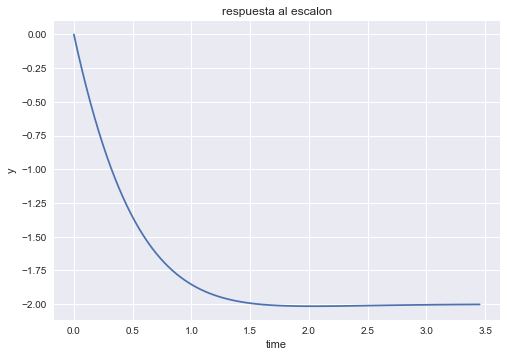

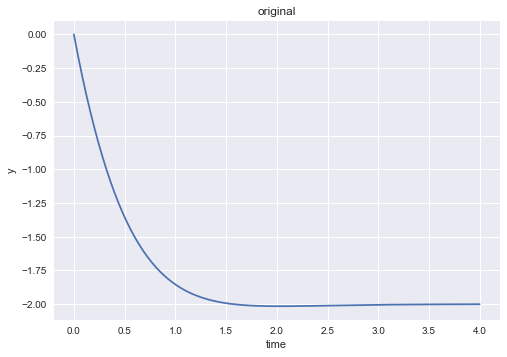

In [58]:
def aja():

    t, y = ct.step_response(H)
    graficar(t, y, 'respuesta al escalon')

aja()

t = np.linspace(0, 4, 300)
y_enun = -2+(2*np.exp(-2*t)*np.cos(t))

graficar(t, y_enun, 'original')


- Utilice el paquete de control de Python para obtener la respuesta al
impulso de la función de transferencia implementada. Grafique en los
mismos ejes la respuesta al impulso calculada previamente y la respuesta
al impulso obtenida en el paquete de control.

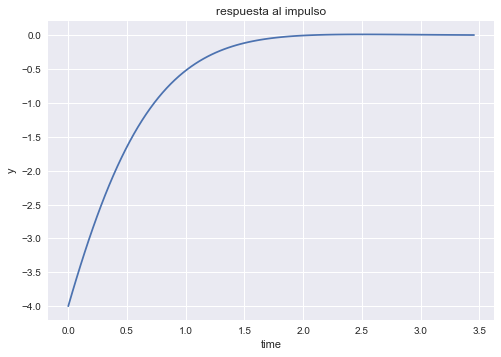

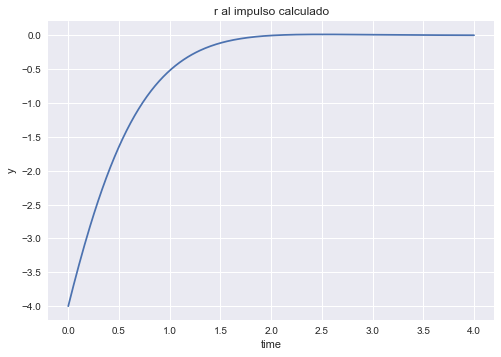

In [59]:
def aja2():
    t, y = ct.impulse_response(H)
    graficar(t, y, 'respuesta al impulso')

aja2()

y_impul = 2*np.exp(-2*t)*((-2*np.cos(t))-np.sin(t))

graficar(t, y_impul, 'r al impulso calculado')

- Determine manualmente la respuesta a la excitación indicada en la
tabla 1 (columna "Excitación"). Asumiendo condiciones iniciales nulas.


- Implemente la función de transferencia en OpenModelica y utilice los
bloques de la librería señales para generar la excitación del ítem anterior.
Determine si la salida obtenida en OpenModelica corresponde
a la solución obtenida en el ítem anterior graficando y superponiendo
ambas señales en Python.

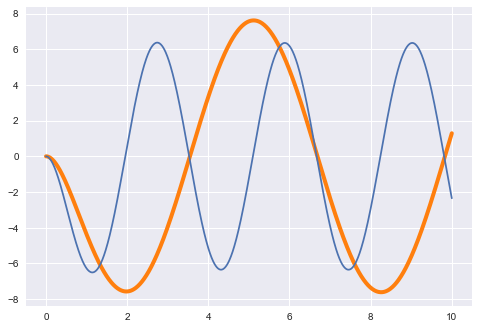

In [60]:
om_parte3_excitacion = pd.read_csv('https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/om_parte3_excitacion.csv', names=['t', 'y'], skiprows=1)

def comparacion_excitacion():
    t = np.linspace(0, 10, 1000)
    salida_excitacion_manual = (np.exp(-2*t) * ( (-3*np.cos(t)) + np.sin(t) )) + ((3*np.cos(t)) - (7*np.sin(t)))
    fig, ax = plt.subplots()

    ax.plot(t,  salida_excitacion_manual, label='Analitico Python', lw=4, color='#ff7f0e')
    ax.plot(om_parte3_excitacion.t, om_parte3_excitacion.y)

comparacion_excitacion()

